# Red Light
## Initial condition

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# set font
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 10

In [3]:
def rho_red_light(x, rho_max):
    rho = rho_max * numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] = 0.5 * rho_max
    return rho

In [4]:
# set parameters
nx = 81
L = 4.0
dx = L / (nx -1)
nt = 40
rho_max = 10.0
u_max = 1.0

x = numpy.linspace(0.0, L, num=nx)
rho0 = rho_red_light(x, rho_max)

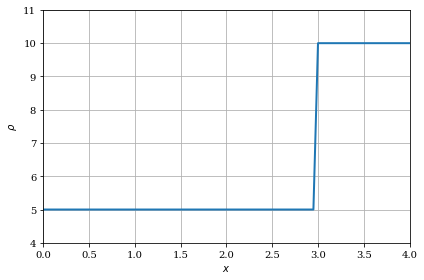

In [5]:
# plot
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0, color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(4.0, 11.0)
pyplot.tight_layout()

## solve problem

In [6]:
def flux(rho, u_max, rho_max):
    F = rho * u_max * (1.0 - rho / rho_max)
    return F

In [7]:
from matplotlib import animation
from IPython.display import HTML

In [8]:
def update_plot(n, rho_hist):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(rho_hist[n])

# Lax-Friedrichs Scheme

Taking average of neighbors value in time derivative.

### sigma = 1.0

In [9]:
def lax_friedrichs(rho0, nt, dt, dx, bc_values, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = flux(rho, *args)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) - dt / (2.0 * dx) * (F[2:] - F[:-2]))
        
        rho[0] = bc_values[0]
        rho[-1] = bc_values[1]
        rho_hist.append(rho.copy())
    return rho_hist

In [10]:
# set CFL
sigma = 1.0
dt = sigma * dx / u_max

rho_hist = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [12]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

### sigma = 0.5

In [13]:
sigma = 0.5
dt = sigma * dx / u_max
rho_hist = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [14]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

### sigma = 0.1

In [15]:
sigma = 0.1
dt = sigma * dx / u_max
rho_hist = lax_friedrichs(rho0, nt, dt, dx, (rho0[0], rho0[-1]), u_max, rho_max)

In [16]:
anim = animation.FuncAnimation(fig, update_plot, frames=nt, fargs=(rho_hist,), interval=100)
HTML(anim.to_html5_video())

# Lax-Wendroff Scheme